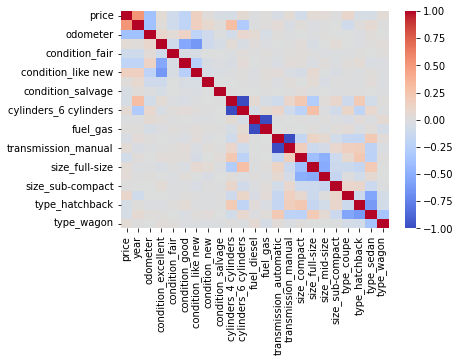

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cars_data = pd.read_csv("vehicles_cleaned_train.csv") #read file

teste = pd.get_dummies(cars_data)

import seaborn as sns 
 
sns.heatmap(teste.corr(), annot=False, cmap='coolwarm') #function used to see what parameters have more influence in price
plt.show()

In [2]:
def prepareCars_Data(cars_data): #Prepare data frame and turn into a Numpy array
    prices = cars_data["price"]
    cars_data = cars_data.drop(columns=['price'])
    #cars_data = cars_data.drop(columns=['type'])
    cars_data = pd.get_dummies(cars_data)
    cars_data['year'] -= 2000
    cars_data['year^2'] = cars_data['year']**2
    cars_data['usage'] = cars_data['year']*cars_data['odometer']
    cars_data['odometer_log'] = np.sqrt(cars_data['odometer'])

    X = cars_data.to_numpy()
    X = np.c_[np.ones((X.shape[0],1)), X]

    d = prices.to_numpy()

    return X, d

In [3]:
# funcition used to recover the best model archived
def prepareCars_Data_Best(cars_data): #25015044.719144292
    prices = cars_data["price"]
    cars_data = cars_data.drop(columns=['price'])
    #cars_data = cars_data.drop(columns=['type'])
    cars_data = pd.get_dummies(cars_data)
    cars_data['year'] -= 2000
    cars_data['year^2'] = cars_data['year']**2
    cars_data['usage'] = cars_data['year']*cars_data['odometer']
    cars_data['odometer_log'] = np.sqrt(cars_data['odometer'])

    X = cars_data.to_numpy()
    X = np.c_[np.ones((X.shape[0],1)), X]

    d = prices.to_numpy()

    return X, d

In [4]:
X, d = prepareCars_Data(cars_data)

In [5]:
R = X.T @ X
p = X.T @ d

w = np.linalg.solve(R, p) #Resolve linear regration 

In [6]:
#Test the model
cars_test = pd.read_csv("vehicles_cleaned_test.csv")

Xt, price_test = prepareCars_Data(cars_test)

Yt = Xt @ w

e = (np.linalg.norm(price_test - Yt))**2/len(Yt) #Calculate quadratic error

print("Best: 25309748.927674085")
e


Best: 25309748.927674085


25015044.719144292